In [146]:
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np
plt.close()


def to_rot_frame(zeta, eta, l):
    x = np.cos(l)*zeta + np.sin(l)*eta
    y = -np.sin(l)*zeta + np.cos(l)*eta
    return np.array([x, y])


plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### 3-body simulations & Resonance


In a sun-jupiter system, we put in 4 zero-mass test particles, two in stable (regular) orbit, two in chaotic orbit. We want to look at:
1. semi-major axis $a$, and eccentricity $e$ with time (Murray Fig 9.4 & 9.6)
2. surface section to check the orbital resonance (Murray Fig 9.5 & 9.7)
3. Lyapounov Characteristic: for chaotic orbits, the sepration of two text particles grows exponentially (Murray Fig 9.10 & Duncan Fig.2)

If we have enough time, the extra:
4. Look at different orbital resonance value (for example 2:1, 3:2, 5:2, 5:3)

In [ ]:
mu2 = 1e-3
mu1 = 1 - mu2
C_j = 3.07


# location 1: stable
a01 = 0.6944
e01 = 0.2065
# location 2: chaotic
a02 = 0.6984
e02 = 0.1967
# small deviation for the pair of particles at each loc
devi = 0.00005

a01d, e01d = a01 + devi, e01 + devi
a02d, e02d = a02 + devi, e02 + devi

# or get location a,e with Murray function 9.5
def get_ae_from_x0(x0, devi = 0, Cj = C_j):
    x0  += devi
    y0  = 0 + devi
    print("for the value of x0:", x0)
    r10     = x0 + mu2
    r20     = mu1 - x0
    vx0_rot = 0
    vy0_rot = (x0**2 + y0**2 + 2*(mu1/r10 + mu2/r20) -vx0_rot**2 - Cj)**0.5

    vx0     = vx0_rot - y0 
    vy0     = vy0_rot + x0

    V2      = vx0_rot**2 + (vy0_rot + x0 + mu2)**2
    h2      = ((x0 + mu2)*(vy0_rot + x0 + mu2))**2

    a00 = 1/(2/r10 - V2/mu1)
    e00 = (1- h2/(a00*mu1))**0.5
    print("you get:", a00, e00)
    return a00, e00, vx0, vy0


# resonance orbits
# a47  =  (4/7)**(2/3)
# print(a47)


x0_pack = [0.55, 0.55001, 0.56, 0.56001]

a01,  e01,  vx01,  vy01  = get_ae_from_x0(x0_pack[0])
a01d, e01d, vx01d, vy01d = get_ae_from_x0(x0_pack[1])
a02,  e02,  vx02,  vy02  = get_ae_from_x0(x0_pack[2])
a02d, e02d, vx02d, vy02d = get_ae_from_x0(x0_pack[3])


# setup simulations
sim = rebound.Simulation()
sim.add(m = mu1, hash = "star")
sim.add(m = mu2, a = 1, hash = "jupiter")

sim.add(m=0, a=a01, e=e01, hash = "loc1")
sim.add(m=0, a=a01d, e=e01d, hash = "loc1_d")
sim.add(m=0, a=a02, e=e02, hash = "loc2")
sim.add(m=0, a=a02d, e=e02d, hash = "loc2_d")


# sim.add(m=0, x=x0_pack[0], y=0, vx=vx01, vy=vy01, hash = "loc1")
# sim.add(m=0, x=x0_pack[1], y=0, vx=vx01d, vy=vy01d, hash = "loc1_d")
# sim.add(m=0, x=x0_pack[2], y=0, vx=vx02, vy=vy02, hash = "loc2")
# sim.add(m=0, x=x0_pack[3], y=0, vx=vx02d, vy=vy02d, hash = "loc2_d")

# print(sim.particles["test_p"].orbit(primary = sim.particles["star"]).a)
# print(sim.particles["test_p"].orbit(primary = sim.particles["star"]).e)


sim.move_to_com()


p_orb    = 2*np.pi
num_orb  = 300
Noutputs = 360*num_orb
times    = np.linspace(0, num_orb*2*np.pi, Noutputs)


tp_a = np.zeros((4, Noutputs))
tp_e = np.zeros((4, Noutputs))
tp_x = np.zeros((4, Noutputs))
tp_y = np.zeros((4, Noutputs))

ang_p = np.zeros(Noutputs)

for i, t in enumerate(times):
    sim.integrate(t)

    for k in range(4):
        tp_a[k, i] = sim.orbits()[k+1].a
        tp_e[k, i] = sim.orbits()[k+1].e
        tp_x[k, i] = sim.particles[k+2].x
        tp_y[k, i] = sim.particles[k+2].y

    orb_p = sim.particles["jupiter"].orbit(primary = sim.particles["star"])
    ang_p[i] = orb_p.theta


for the value of x0: 0.55
you get: 0.6958479821106044 0.2081603824893759
for the value of x0: 0.55001
you get: 0.6958519812452557 0.2081505624027322
for the value of x0: 0.56
you get: 0.6998055402428616 0.19834873012678703
for the value of x0: 0.56001
you get: 0.6998094554654463 0.19833892551956173


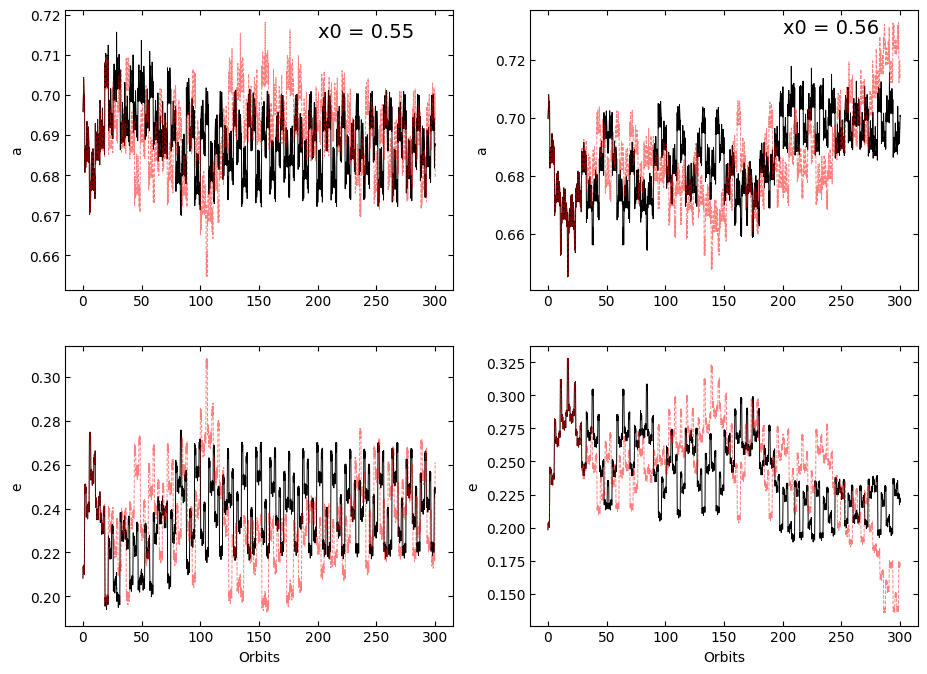

In [148]:
# plot the a,e for 4 particles in 2 different location
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(11, 8))


ax1[0].plot(times / p_orb, tp_a[0], 
         linewidth = 0.7, color = "black", alpha  =1)
ax2[0].plot(times / p_orb, tp_e[0], 
         linewidth = 0.7, color = "black", alpha  =1)

ax1[0].plot(times / p_orb, tp_a[1], 
         linewidth = 0.7, linestyle = "--", color = "red", alpha  =0.5)
ax2[0].plot(times / p_orb, tp_e[1], 
         linewidth = 0.7, linestyle = "--", color = "red", alpha  =0.5)


ax1[0].set_ylabel("a")
ax2[0].set_ylabel("e")
ax2[0].set_xlabel("Orbits")



ax1[1].plot(times / p_orb, tp_a[2], 
         linewidth = 0.7, color = "black", alpha  =1)
ax2[1].plot(times / p_orb, tp_e[2], 
         linewidth = 0.7, color = "black", alpha  =1)

ax1[1].plot(times / p_orb, tp_a[3], 
         linewidth = 0.7, linestyle = "--", color = "red", alpha  =0.5)
ax2[1].plot(times / p_orb, tp_e[3], 
         linewidth = 0.7, linestyle = "--", color = "red", alpha  =0.5)


ax1[1].set_ylabel("a")
ax2[1].set_ylabel("e")
ax2[1].set_xlabel("Orbits")

# ax2[0].text(0, 0.31, "Shifted x0 \n by 0.0001",
#              color = "red", alpha  =0.5, fontsize = 14)

ax1[0].text(200, 0.995*np.max([tp_a[0], tp_a[1]]), f"x0 = {x0_pack[0]}", fontsize =14)
ax1[1].text(200, 0.995*np.max([tp_a[2], tp_a[3]]), f"x0 = {x0_pack[2]}", fontsize =14)
plt.show()

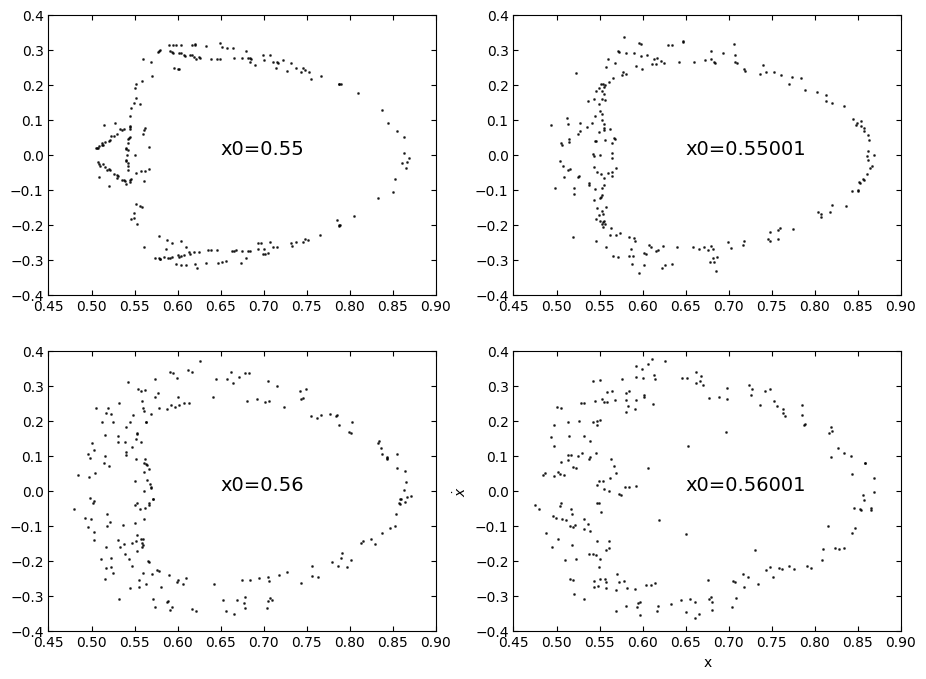

In [155]:
tp_x_rot = np.zeros((4, Noutputs))
tp_y_rot = np.zeros((4, Noutputs))


fig, ax = plt.subplots(2, 2, figsize=(11, 8))

for i in range(4):
    tp_x_rot[i], tp_y_rot[i] = to_rot_frame(tp_x[i], tp_y[i], ang_p)

    zero_crossings = np.where(np.diff(np.sign(tp_y_rot[i])))[0]

    tp_dxdt = np.gradient(tp_x_rot[i], times)
    tp_dydt = np.gradient(tp_y_rot[i], times)


    dxdt = 0.5*(tp_dxdt[zero_crossings + 1] + tp_dxdt[zero_crossings])
    x    = 0.5*(tp_x_rot[i][zero_crossings + 1] + tp_x_rot[i][zero_crossings])

    ax[i//2][i%2].scatter(x, dxdt, s=1, alpha = 0.7, color = "black")
    ax[i//2][i%2].text(0.65, 0, f"x0={x0_pack[i]}", fontsize = 14)
    ax[i//2][i%2].set_xlim(xmin = 0.45, xmax= 0.9)
    ax[i//2][i%2].set_ylim(ymin = -0.4, ymax= 0.4)


plt.xlabel("x")
plt.ylabel(r"$\dot{x}$")
plt.show()

/tmp/ipykernel_923/2276439564.py:9: RuntimeWarning: divide by zero encountered in divide
  gamma[0] = np.log(di[0]/d0) /times
/tmp/ipykernel_923/2276439564.py:10: RuntimeWarning: divide by zero encountered in divide
  gamma[1] = np.log(di[1]/d0) /times
/tmp/ipykernel_923/2276439564.py:13: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(times), np.log(gamma[0]))
/tmp/ipykernel_923/2276439564.py:13: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(times), np.log(gamma[0]))
/tmp/ipykernel_923/2276439564.py:14: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(times), np.log(gamma[1]))


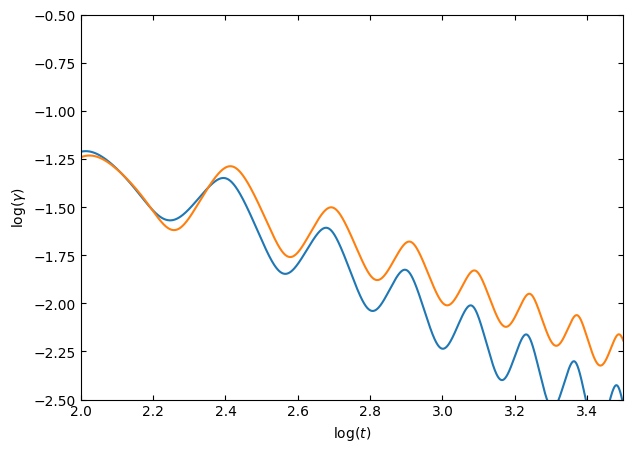

In [156]:
# now we plot the Lyapounov Characteristic: gamma
d0    = 0.00001
di    = np.zeros((2, Noutputs))
gamma = np.zeros((2, Noutputs))

di[0] = ((tp_x[0] - tp_x[1])**2 + (tp_y[0] - tp_y[1])**2)**0.5
di[1] = ((tp_x[2] - tp_x[3])**2 + (tp_y[2] - tp_y[3])**2)**0.5

gamma[0] = np.log(di[0]/d0) /times
gamma[1] = np.log(di[1]/d0) /times

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.plot(np.log(times), np.log(gamma[0]))
ax.plot(np.log(times), np.log(gamma[1]))
# ax.set_xscale("log")
# ax.set_yscale("log")
ax.set_xlim(xmin=2, xmax = 3.5)
ax.set_ylim(ymin=-2.5, ymax = -0.5)

ax.set_xlabel(r"$\log(t)$")
ax.set_ylabel(r"$\log(\gamma)$")
plt.show()

for the value of x0: 0.448
you get: 0.6513279775947113 0.31063916268711217


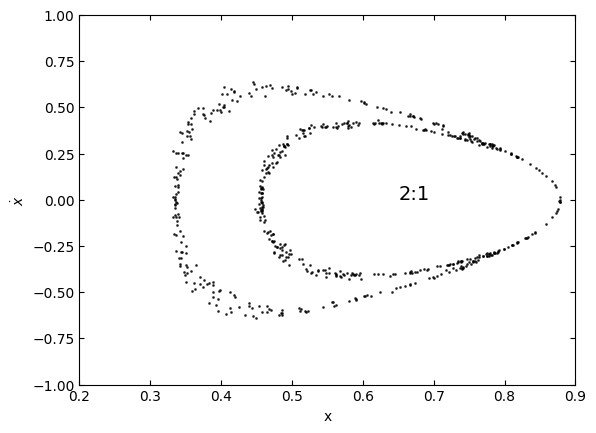

In [192]:
# extra part: can we see different resonance cricles?

# for a given x0, cj, we can run a simulation and plot 
def run_one_plot(x0, CJ, norb=600, 
                 note="unknown", loc = [0,0]):
    a000,  e000,  vx000,  vy000  = get_ae_from_x0(x0, Cj = CJ)

    # setup simulations
    sim = rebound.Simulation()
    sim.add(m = mu1, hash = "star")
    sim.add(m = mu2, a = 1, hash = "jupiter")
    sim.add(m=0, a=a000, e=e000, hash = "loc1")
    # sim.add(m=0, x=x0, y=0, vx=vx000, vy=vy000, hash = "loc1")
    sim.move_to_com()

    num_orb  = norb
    Noutputs = 180*num_orb
    times    = np.linspace(0, num_orb*2*np.pi, Noutputs)

    # tp_a = np.zeros(Noutputs)
    # tp_e = np.zeros(Noutputs)
    tp_x = np.zeros(Noutputs)
    tp_y = np.zeros(Noutputs)

    ang_p = np.zeros(Noutputs)

    for i, t in enumerate(times):
        sim.integrate(t)
        # tp_a[i] = sim.orbits()[1].a
        # tp_e[i] = sim.orbits()[1].e
        tp_x[i] = sim.particles[2].x
        tp_y[i] = sim.particles[2].y
        orb_p = sim.particles["jupiter"].orbit(primary = sim.particles["star"])
        ang_p[i] = orb_p.theta

    # change to the rotating frame
    tp_x_rot, tp_y_rot = to_rot_frame(tp_x, tp_y, ang_p)

    zero_crossings = np.where(np.diff(np.sign(tp_y_rot)))[0]

    tp_dxdt = np.gradient(tp_x_rot, times)
    dxdt    = 0.5*(tp_dxdt[zero_crossings + 1] + tp_dxdt[zero_crossings])
    x       = 0.5*(tp_x_rot[zero_crossings + 1] + tp_x_rot[zero_crossings])

    plt.scatter(x, dxdt, s=1, alpha = 0.7, color = "black")
    plt.text(loc[0], loc[1],  note, fontsize = 14)
    plt.xlim(xmin = 0.2, xmax= 0.9)
    plt.ylim(ymin = -1, ymax= 1)


    plt.xlabel("x")
    plt.ylabel(r"$\dot{x}$")
    plt.show()



# 2:1 resonance:
run_one_plot(0.448, 3.07, note="2:1", loc = [0.65, 0])


for the value of x0: 0.8
you get: 0.7448072385205545 0.07544604640398452


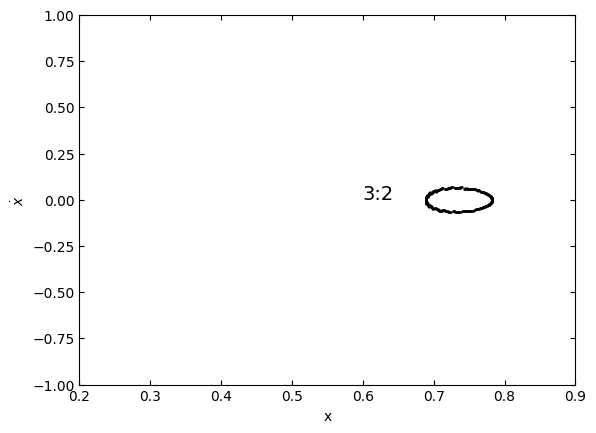

In [ ]:
# 3:2
run_one_plot(0.8, 3.07, note="3:2", loc = [0.6, 0])

for the value of x0: 0.55
you get: 0.6958479821106044 0.2081603824893759


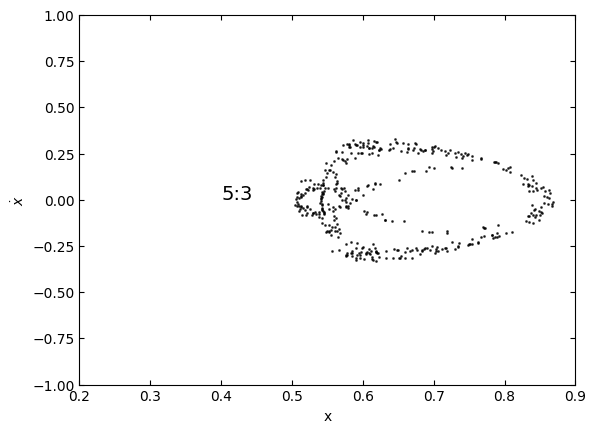

In [199]:
# 5:3
run_one_plot(0.55, 3.07, note="5:3", loc = [0.4, 0])

### Part 2: N-body simulations (with solar system)


TBD